In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data=np.genfromtxt("diabetes2.csv",delimiter=',')
data.shape

(769, 9)

In [15]:
x_train=data[1:650,0:8]
y_train=data[1:650,8:9]
print(x_train.shape,y_train.shape)
x_test=data[650:,0:8]
y_test=data[650:,8:9]

(649, 8) (649, 1)


In [16]:
x_train.shape[1]
# y_train[1]

8

In [17]:
def sigmoid(x):
    temp=1+np.exp(-x)
    return 1/temp

In [18]:
print(sigmoid(1))

0.7310585786300049


In [19]:
def log_likeyhood(x,y,theta):
    score=np.dot(x,theta)
    temp=np.sum(y*score-np.log(1+np.exp(score)))
    return temp

In [20]:
def logistic_regression(x,y,weight):
    rate=0.001
    gradient=0
    for i in range(len(x)):
        score=np.dot(weight,x[i])
        prediction=sigmoid(score)
        error=y[i]-prediction
        gradient+=x[i]*error
    weight+=rate*gradient/len(x)
    return weight

In [24]:
weight=np.zeros(x_train.shape[1])
arr=[]
for i in range(10000):
    weight=logistic_regression(x_train,y_train,weight)
    if i%1000==0:
        temp=log_likeyhood(x_train,y_train,weight)
        print(temp)
        arr.append(temp)
print(weight)

-432301.35120383697
-854955.8842747101
-883577.748331583
-910740.2588938448
-934059.0491279925
-953144.5551978687
-968206.2028480688
-979742.6677727716
-988369.6684794131
-994702.5641746712
[ 0.52183913  0.04985812 -0.08816683 -0.00798727  0.01426625  0.01263536
  0.08947173 -0.06167397]


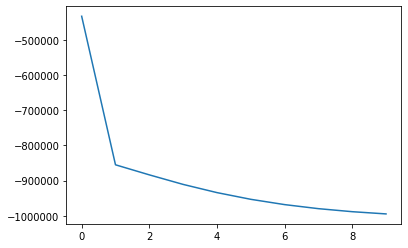

In [25]:
plt.plot(arr)

In [22]:
for i in range(len(x_test)):
    score=np.dot(weight,x_test[i])
    print(np.round(sigmoid(score)),y_test[i])
print(log_likeyhood(x_test,y_test,weight))

0.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
0.0 [0.]
1.0 [0.]
0.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
0.0 [0.]
0.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
0.0 [0.]
0.0 [0.]
1.0 [0.]
0.0 [0.]
1.0 [1.]
1.0 [1.]
0.0 [0.]
1.0 [1.]
1.0 [0.]
0.0 [0.]
1.0 [1.]
0.0 [0.]
1.0 [1.]
0.0 [0.]
1.0 [0.]
1.0 [0.]
0.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
0.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
0.0 [1.]
0.0 [1.]
1.0 [0.]
1.0 [0.]
0.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
0.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
0.0 [1.]
0.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
0.0 [0.]
0.0 [0.]
1.0 [0.]
0.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
0.0 [0.]
1.0 [0.]
0.0 [0.]
0.0 [0.]
1.0 [0.]
0.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
0.0 [1.]
0.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
0.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
0.0 [1.]
1.0 [0.]
0.0 [1.]
0.0 [0.]
1.0 [1.]
0

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(x_train, y_train)

print(clf.intercept_, clf.coef_)

[-8.44550652] [[ 1.34547844e-01  3.31881739e-02 -1.27291931e-02 -3.50452216e-04
  -9.59317401e-04  9.88203831e-02  1.04509216e+00  1.02568933e-02]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
for i in range(len(x_test)):
    score=np.dot(clf.coef_[0],x_test[i])
    print(np.round(sigmoid(score)),y_test[i])

1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [0.]
1.0 [1.]
1.0 [1.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1.0 [0.]
1.0 [1.]
1